In [55]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [57]:
wine_dataset = pd.read_csv("wine_dataset.csv")
ufc_dataset = pd.read_csv("ufc_data.csv")
ufc_dataset.loc[ufc_dataset["Winner"] == "Red", "Winner"] = 1
ufc_dataset.loc[ufc_dataset["Winner"] == "Blue", "Winner"] = 0
ufc_dataset.drop(["no_of_rounds"], axis=1 ,inplace=True)
# al zero
ufc_dataset.drop(["B_draw"], axis=1 ,inplace=True)
ufc_dataset.drop(["R_draw"], axis=1 ,inplace=True)

ufcX = ufc_dataset.drop("Winner", 1).copy().values
ufcY = ufc_dataset["Winner"].copy().values
ufc_x_df = ufc_dataset.drop("Winner",1)

wineX = wine_dataset.drop("class", 1).copy().values
wineY = wine_dataset["class"].copy().values
wine_x_df = wine_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
ufcX = min_max_scaler.fit_transform(ufcX)
ufcX_df = pd.DataFrame(ufcX, columns=ufc_x_df.columns)
wineX = min_max_scaler.fit_transform(wineX)
wineX_df = pd.DataFrame(wineX, columns=wine_x_df.columns)

In [58]:
ufcX.shape
dims_ufc = list(range(2,150,1))

/home/okazkayasi/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/okazkayasi/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/okazkayasi/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/okazkayasi/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/okazkayasi/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastic

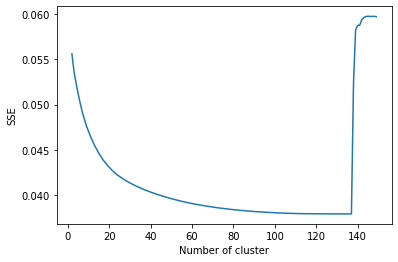

In [37]:
rc_errors = {}
for dim in dims_ufc:
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(ufcX_df.values)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(ufcX_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [59]:
comp = 80
ica = FastICA(n_components=comp, random_state=44, max_iter=1000)
ica_result = ica.fit_transform(ufcX_df.values)
for i in range(comp):
    field_name = "ica-"+str(i)
    ufcX_df[field_name] = ica_result[:,i]
    ufc_dataset[field_name] = ica_result[:,i]
ufcX_ica_80 = ica_result

In [60]:
ica_result.shape

(3592, 80)

In [61]:
ufcX_df.head()

,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,ica-70,ica-71,ica-72,ica-73,ica-74,ica-75,ica-76,ica-77,ica-78,ica-79
0,1.0,0.0,0.333333,0.187755,0.153846,0.002299,0.000000,0.230996,0.158462,0.029545,...,0.002877,0.018749,0.001608,-0.002854,-0.001629,-0.010821,-0.010074,-0.006688,-0.013619,-0.001324
1,1.0,0.0,0.250000,0.297959,0.233333,0.135632,0.107353,0.460148,0.323846,0.027273,...,0.002367,-0.008880,0.007040,0.006238,-0.000350,-0.019255,-0.002624,-0.007645,-0.002975,-0.002169
2,0.0,0.0,0.250000,0.313364,0.290323,0.077494,0.064516,0.312701,0.296774,0.062683,...,0.005293,0.019380,0.002734,0.013964,-0.008276,0.096729,-0.011782,-0.003723,0.005715,-0.001582
3,0.0,0.0,0.333333,0.346939,0.358974,0.158046,0.161765,0.404059,0.375000,0.147727,...,0.004714,0.036489,-0.002089,-0.016124,-0.006727,-0.005396,-0.013449,-0.009467,0.009244,-0.001142
4,0.0,0.0,0.083333,0.346939,0.371795,0.028736,0.029412,0.741697,0.457692,0.000000,...,0.005985,-0.003707,0.003637,-0.010831,-0.006615,0.000981,0.001923,-0.007765,-0.006747,-0.003300


In [46]:
rndperm = np.random.permutation(ufc_dataset.shape[0])


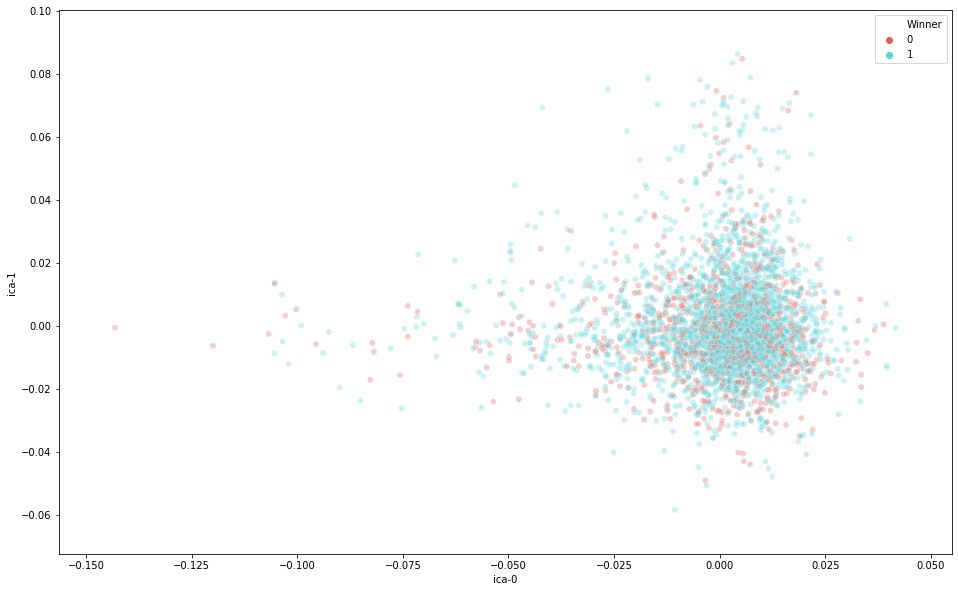

In [62]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="Winner",
    palette=sns.color_palette("hls", 2),
    data=ufc_dataset,
    legend="full",
    alpha=0.3
)

/home/okazkayasi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


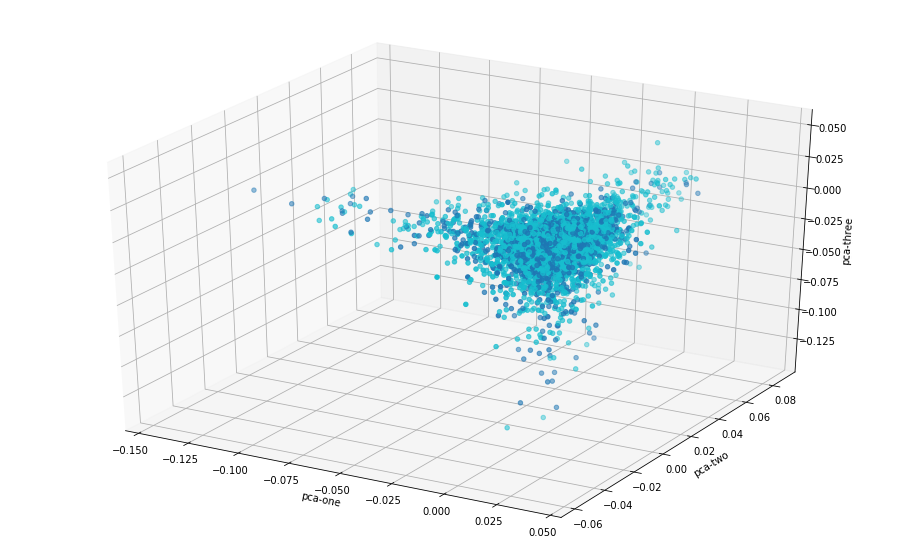

In [63]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=ufc_dataset.loc[rndperm,:]["ica-0"], 
    ys=ufc_dataset.loc[rndperm,:]["ica-1"], 
    zs=ufc_dataset.loc[rndperm,:]["ica-2"], 
    c=ufc_dataset.loc[rndperm,:]["Winner"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## UFC Clustering on ICA

In [65]:
from sklearn.cluster import KMeans
clusters = list(range(2,31,1))

For n_clusters=2, The Silhouette Coefficient is 0.011375767269443195
For n_clusters=2, The homogeneity_score is 0.001261442646628749
For n_clusters=3, The Silhouette Coefficient is -0.008328119538140125
For n_clusters=3, The homogeneity_score is 0.00048376195854951394
For n_clusters=4, The Silhouette Coefficient is 0.010232525834892713
For n_clusters=4, The homogeneity_score is 0.002073284848714863
For n_clusters=5, The Silhouette Coefficient is 0.021573023344680555
For n_clusters=5, The homogeneity_score is 0.0014343375432523012
For n_clusters=6, The Silhouette Coefficient is 0.02711245084582209
For n_clusters=6, The homogeneity_score is 0.003454115914667758
For n_clusters=7, The Silhouette Coefficient is 0.021720787061037476
For n_clusters=7, The homogeneity_score is 0.003517634758962161
For n_clusters=8, The Silhouette Coefficient is 0.024800211050013225
For n_clusters=8, The homogeneity_score is 0.006041480500381811
For n_clusters=9, The Silhouette Coefficient is 0.0310762172485759

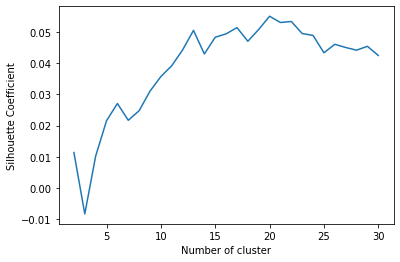

In [66]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX_ica_80)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ufcX_ica_80, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.06203282055148855
For n_clusters=2, The homogeneity_score is 0.00013541510551280997
For n_clusters=2, The log_likelihood score is 228.71375187041085
For n_clusters=3, The Silhouette Coefficient is 0.02768938272008968
For n_clusters=3, The homogeneity_score is 0.0046859110582737114
For n_clusters=3, The log_likelihood score is 233.86015839302178
For n_clusters=4, The Silhouette Coefficient is 0.021700398723113256
For n_clusters=4, The homogeneity_score is 0.001414947072260986
For n_clusters=4, The log_likelihood score is 237.83179279372683
For n_clusters=5, The Silhouette Coefficient is 0.022393615335690325
For n_clusters=5, The homogeneity_score is 0.00829413215919942
For n_clusters=5, The log_likelihood score is 248.66105933780185
For n_clusters=6, The Silhouette Coefficient is 0.02711245084582209
For n_clusters=6, The homogeneity_score is 0.003454115914667758
For n_clusters=6, The log_likelihood score is 247.36744398561262
For n_clust

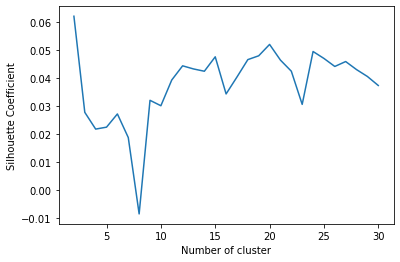

In [67]:
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(ufcX_ica_80)
    label = gmm.predict(ufcX_ica_80)
    sil_coeff = silhouette_score(ufcX_ica_80, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(ufcX_ica_80)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

# WINE DATASET

In [48]:
dims_wine = list(range(1,14,1))

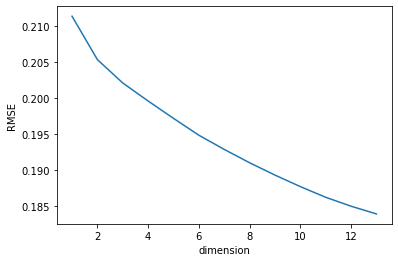

In [49]:
rc_errors_wine = {}
for dim in dims_wine:
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(wineX_df.values)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(wineX_df.values, reconstructed)    
    rc_errors_wine[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors_wine.keys()), list(rc_errors_wine.values()))
plt.xlabel("dimension")
plt.ylabel("RMSE")
plt.show()

In [68]:
comp = 3
ica = FastICA(n_components=comp, random_state=44, max_iter=1000)
ica_result = ica.fit_transform(wineX_df.values)
for i in range(comp):
    field_name = "ica-"+str(i)
    wineX_df[field_name] = ica_result[:,i]
    wine_dataset[field_name] = ica_result[:,i]
wineX_ica_3 = ica_result

In [52]:
rndperm = np.random.permutation(wine_dataset.shape[0])


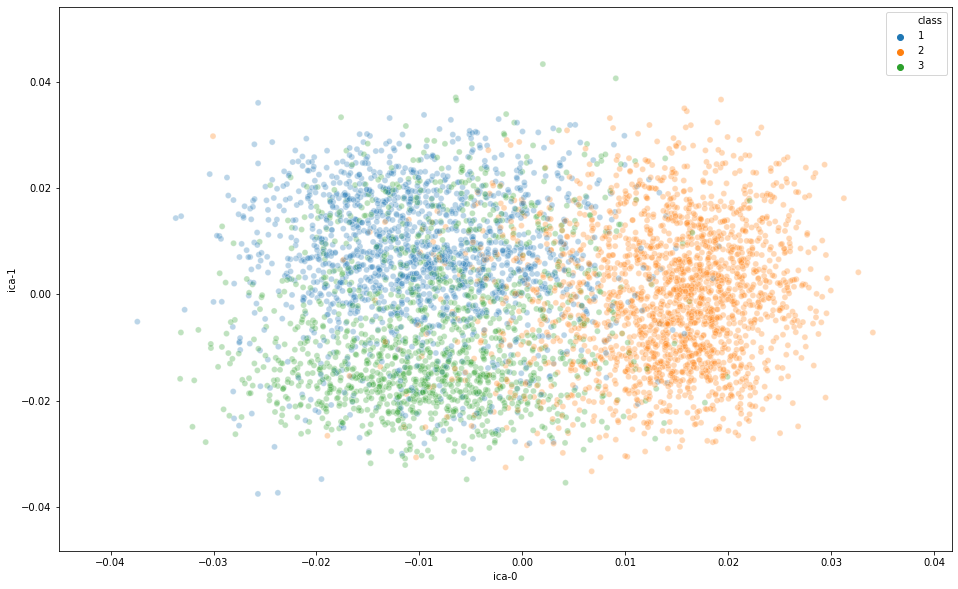

In [53]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="class",
    palette=sns.color_palette("tab10", 3),
    data=wine_dataset,
    legend="full",
    alpha=0.3
)

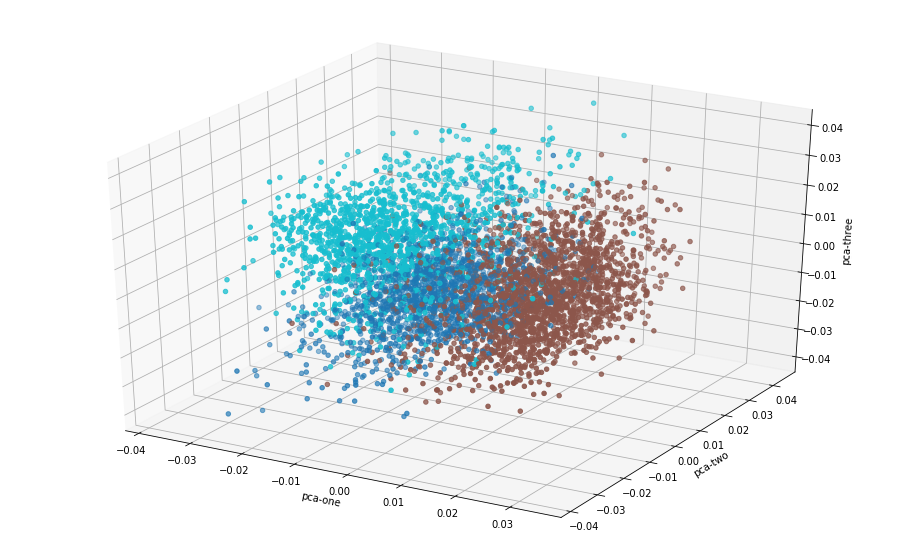

In [54]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=wine_dataset.loc[rndperm,:]["ica-0"], 
    ys=wine_dataset.loc[rndperm,:]["ica-1"], 
    zs=wine_dataset.loc[rndperm,:]["ica-2"], 
    c=wine_dataset.loc[rndperm,:]["class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.27695054540569325
For n_clusters=2, The homogeneity_score is 0.3703638785788254
For n_clusters=3, The Silhouette Coefficient is 0.35531022033610965
For n_clusters=3, The homogeneity_score is 0.6728743990227648
For n_clusters=4, The Silhouette Coefficient is 0.35707528944094374
For n_clusters=4, The homogeneity_score is 0.5943241120836125
For n_clusters=5, The Silhouette Coefficient is 0.3462931572338014
For n_clusters=5, The homogeneity_score is 0.6178892241174596
For n_clusters=6, The Silhouette Coefficient is 0.3124409084087433
For n_clusters=6, The homogeneity_score is 0.6502753563305413
For n_clusters=7, The Silhouette Coefficient is 0.3035743658237351
For n_clusters=7, The homogeneity_score is 0.6574651550061366
For n_clusters=8, The Silhouette Coefficient is 0.28458247939603354
For n_clusters=8, The homogeneity_score is 0.6606565584833761
For n_clusters=9, The Silhouette Coefficient is 0.28453363390023106
For n_clusters=9, The hom

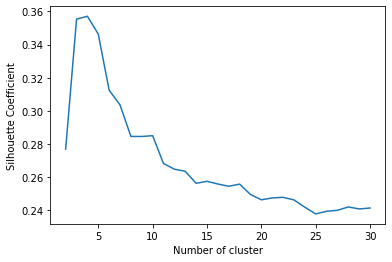

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh_wine = {}
homog_wine = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX_ica_3)
    label = kmeans.labels_
    sil_coeff = silhouette_score(wineX_ica_3, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.27485634931064284
For n_clusters=2, The homogeneity_score is 0.3779939038195592
For n_clusters=2, The log_likelihood score is 8.798064273169038
For n_clusters=3, The Silhouette Coefficient is 0.35310774582260873
For n_clusters=3, The homogeneity_score is 0.6674512165741108
For n_clusters=3, The log_likelihood score is 8.894261087156188
For n_clusters=4, The Silhouette Coefficient is 0.3407099541275936
For n_clusters=4, The homogeneity_score is 0.6297456772444832
For n_clusters=4, The log_likelihood score is 8.937781038348454
For n_clusters=5, The Silhouette Coefficient is 0.30706721786733954
For n_clusters=5, The homogeneity_score is 0.6555393290792442
For n_clusters=5, The log_likelihood score is 8.962156863188499
For n_clusters=6, The Silhouette Coefficient is 0.3115733891925174
For n_clusters=6, The homogeneity_score is 0.6685231329501683
For n_clusters=6, The log_likelihood score is 8.963140460527258
For n_clusters=7, The Silhouette

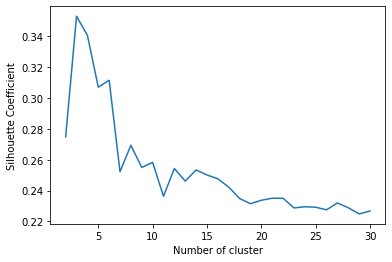

In [70]:
from sklearn.mixture import GaussianMixture
silh_wine_EM = {}
homog__wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(wineX_ica_3)
    label = gmm.predict(wineX_ica_3)
    sil_coeff = silhouette_score(wineX_ica_3, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog__wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(wineX_ica_3)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Neural Network on ICA

In [71]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(wineX_ica_3, wineY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(wineX_ica_3)
accuracy = accuracy_score(wineY, ufc_train_predictions)
print(accuracy)
print(classification_report(wineY, ufc_train_predictions))

0.9132
              precision    recall  f1-score   support

           1       0.91      0.92      0.91      1577
           2       0.91      0.91      0.91      2013
           3       0.92      0.91      0.91      1410

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, wineX_ica_3, wineY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.90809355, 0.88601381, 0.91225111, 0.91006286, 0.92210888,
        0.91198896, 0.92000753, 0.91193487, 0.91419316, 0.92608582]),
 0.9122740537304784)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wineX_ica_3, 
                                                    wineY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=wineY)

In [76]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [77]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [78]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

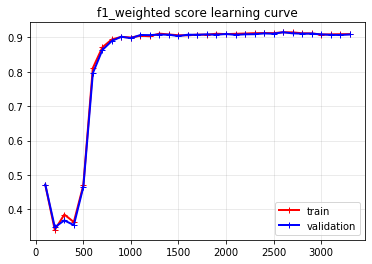

In [79]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [80]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [81]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, 
                      f1_score, average="weighted")

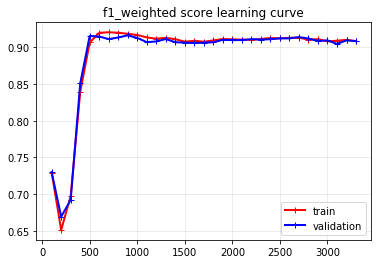

In [82]:
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   24.4s finished


[0.90867121 0.91028178 0.9098488 ] [0.90958399 0.91020597 0.91017922] [(60, 60), (80, 80), (100, 100)]


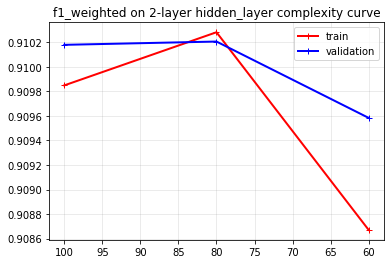

In [83]:
from sklearn.model_selection import validation_curve
params = [60, 80, 100]
param_range = [(60,60), (80,80), (100,100)]

train_scores, test_scores = validation_curve(
    best_net, X_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, scoring='f1_weighted', verbose=1, cv=5, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), params, 
                title='f1_weighted on 2-layer hidden_layer complexity curve', inverse_x=True)

In [84]:
# start with the best net from Assignment 1
best_net_ICA = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80, 80), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

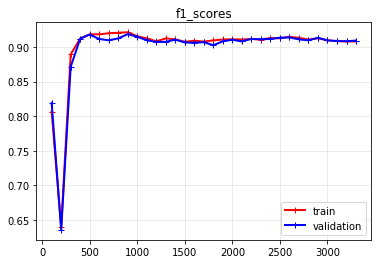

In [85]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net_ICA, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

In [86]:
from sklearn.metrics import confusion_matrix
best_net_ICA.fit(X_train, y_train)
test_predictions = best_net_ICA.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           1    0.92816   0.91747   0.92278       521
           2    0.92694   0.91717   0.92203       664
           3    0.90377   0.92903   0.91622       465

    accuracy                        0.92061      1650
   macro avg    0.91962   0.92122   0.92034      1650
weighted avg    0.92079   0.92061   0.92063      1650

[[478  25  18]
 [ 27 609  28]
 [ 10  23 432]]
